In [3]:
pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/35/73/01417cd116bd3809d8796bb1b4030b77c632210aeed05e27a1fc7c885134/ultralytics-8.1.24-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.4 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.4 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.4 kB 108.9 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/40.4 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 40.4/40.4 kB 191.8 kB/s eta 0:00:00
  Obtaining dependency information for torch>=1.8.0 from https://files.pythonhosted.org/packages/59/1f/4975d1ab3ed2244053876321ef65bc02935daed67da76c6e7d65900772a3/torch-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision>=0.9.0 from https://files.pythonhosted.org/packages/e7/45/419aa0b37254f1

   -------------------- ----------------- 105.1/198.6 MB 428.5 kB/s eta 0:03:39
   -------------------- ----------------- 105.1/198.6 MB 427.9 kB/s eta 0:03:39
   -------------------- ----------------- 105.1/198.6 MB 428.5 kB/s eta 0:03:39
   -------------------- ----------------- 105.1/198.6 MB 427.9 kB/s eta 0:03:39
   -------------------- ----------------- 105.2/198.6 MB 428.5 kB/s eta 0:03:39
   -------------------- ----------------- 105.2/198.6 MB 428.5 kB/s eta 0:03:39
   -------------------- ----------------- 105.2/198.6 MB 428.2 kB/s eta 0:03:39
   -------------------- ----------------- 105.2/198.6 MB 428.5 kB/s eta 0:03:38
   -------------------- ----------------- 105.2/198.6 MB 428.2 kB/s eta 0:03:38
   -------------------- ----------------- 105.2/198.6 MB 427.6 kB/s eta 0:03:39
   -------------------- ----------------- 105.3/198.6 MB 427.9 kB/s eta 0:03:39
   -------------------- ----------------- 105.3/198.6 MB 427.9 kB/s eta 0:03:38
   -------------------- ----------------

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import cv2

AxesImage(size=(1464, 1920))


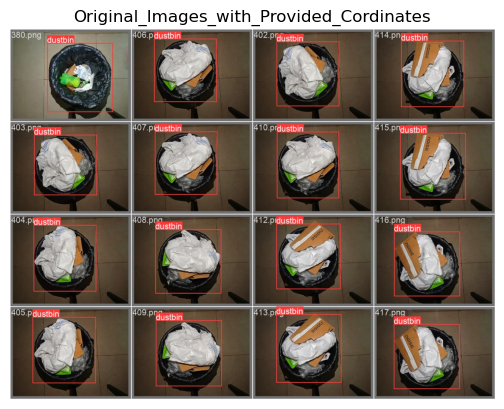

In [21]:
# Original Images with Provided Cordinates
validation_Images_1=cv2.imread(os.getcwd()+"\\runs\\detect\\train\\val_batch0_labels.jpg")
plt.title("Original_Images_with_Provided_Cordinates")
plt.axis('off')
print(plt.imshow(validation_Images_1[:,:,::-1]))

AxesImage(size=(1464, 1920))


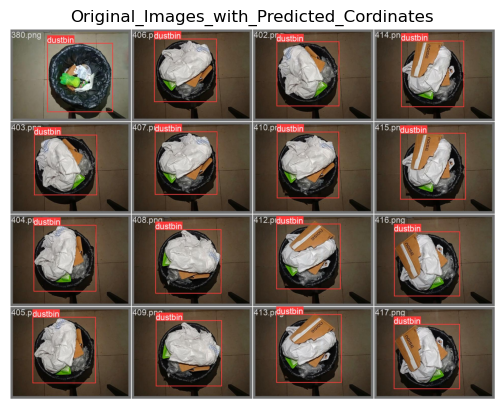

In [22]:
# Original Images with Predicted Cordinates
validation_Images_2=cv2.imread(os.getcwd()+"\\runs\\detect\\train\\val_batch0_pred.jpg")
plt.title("Original_Images_with_Predicted_Cordinates")
plt.axis('off')
print(plt.imshow(validation_Images_1[:,:,::-1]))

AxesImage(size=(2250, 3000))


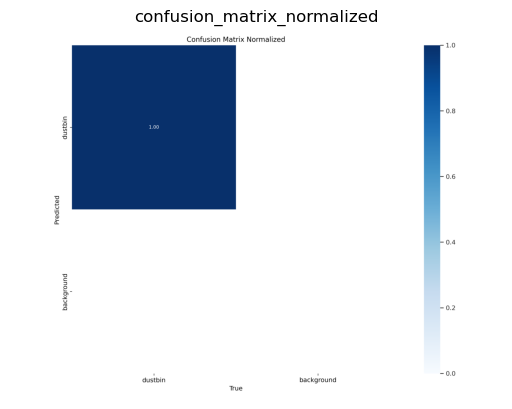

In [23]:
#Confusion Matrix
confusion_matrix_normalized=cv2.imread(os.getcwd()+"\\runs\\detect\\train\\confusion_matrix_normalized.png")
plt.title("confusion_matrix_normalized")
plt.axis('off')
print(plt.imshow(confusion_matrix_normalized[:,:,::-1]))

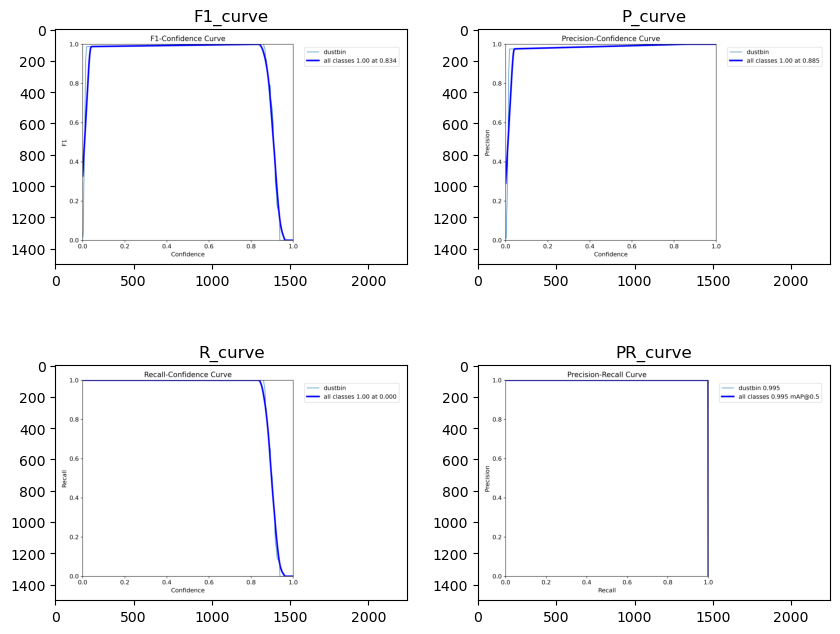

In [30]:
# Showing Results and Plots
fig=plt.figure(figsize=(10,8))
columns=2
rows=2
i=1
files = ['F1_curve.png','P_curve.png','R_curve.png','PR_curve.png']
for file in files:
    img=cv2.imread(os.getcwd()+"\\runs\\detect\\train\\"+file) 
    fig.add_subplot(rows,columns,i).title.set_text(file[0:file.find(".")])
    i=i+1
    plt.imshow(img[:,:,::-1])

AxesImage(size=(1200, 2400))


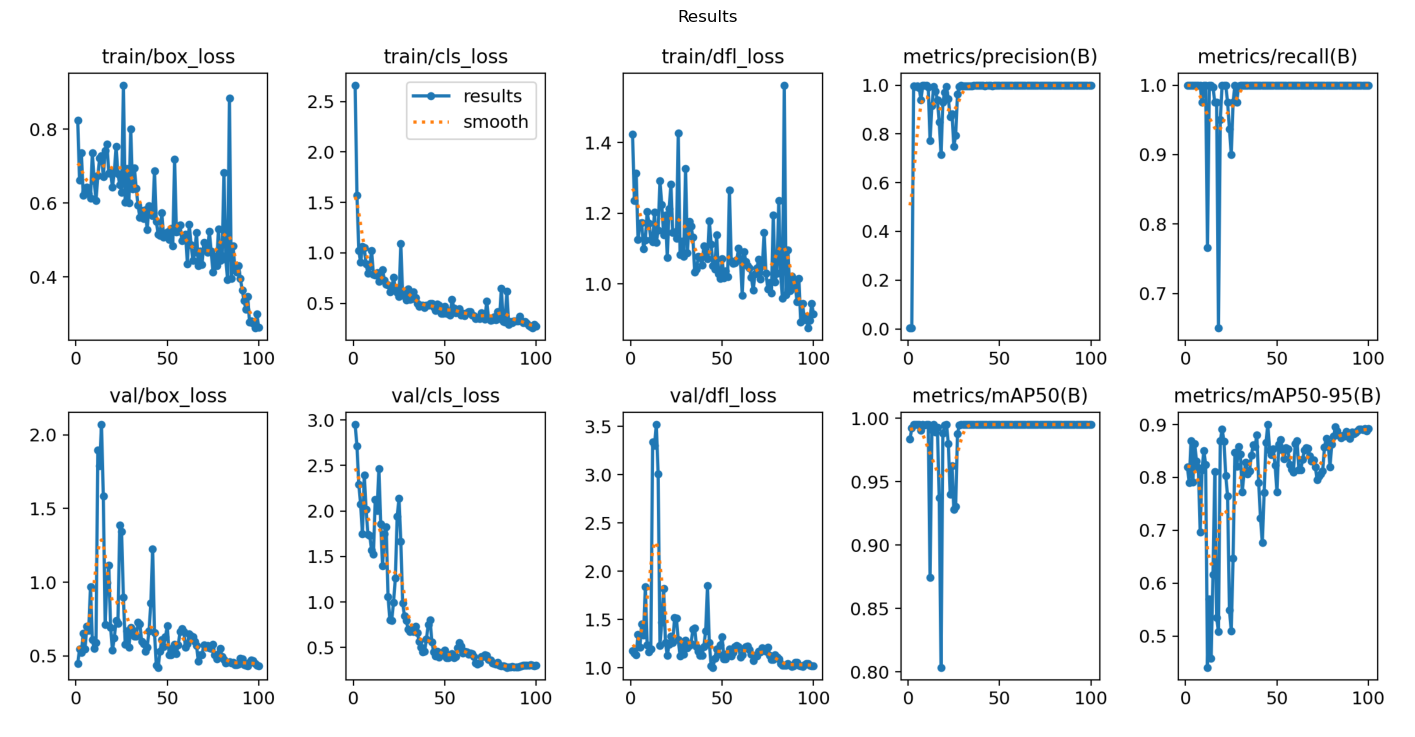

In [34]:
# Result
plt.rcParams["figure.figsize"] = (18, 10)
results=cv2.imread(os.getcwd()+"\\runs\\detect\\train\\results.png")
plt.title("Results")
plt.axis('off')
print(plt.imshow(results[:,:,::-1]))

In [2]:
model=YOLO(os.getcwd()+"\\runs\\detect\\train\\weights\\best.pt")


image 1/1 C:\Users\bhara\J_Component\Dustbin_detection\test\224.png: 480x640 1 dustbin, 169.9ms
Speed: 6.7ms preprocess, 169.9ms inference, 12.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\bhara\J_Component\Dustbin_detection\test\225.png: 480x640 1 dustbin, 99.6ms
Speed: 3.0ms preprocess, 99.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\bhara\J_Component\Dustbin_detection\test\400.png: 480x640 1 dustbin, 105.3ms
Speed: 3.1ms preprocess, 105.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\bhara\J_Component\Dustbin_detection\test\444.png: 480x640 1 dustbin, 100.3ms
Speed: 3.0ms preprocess, 100.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


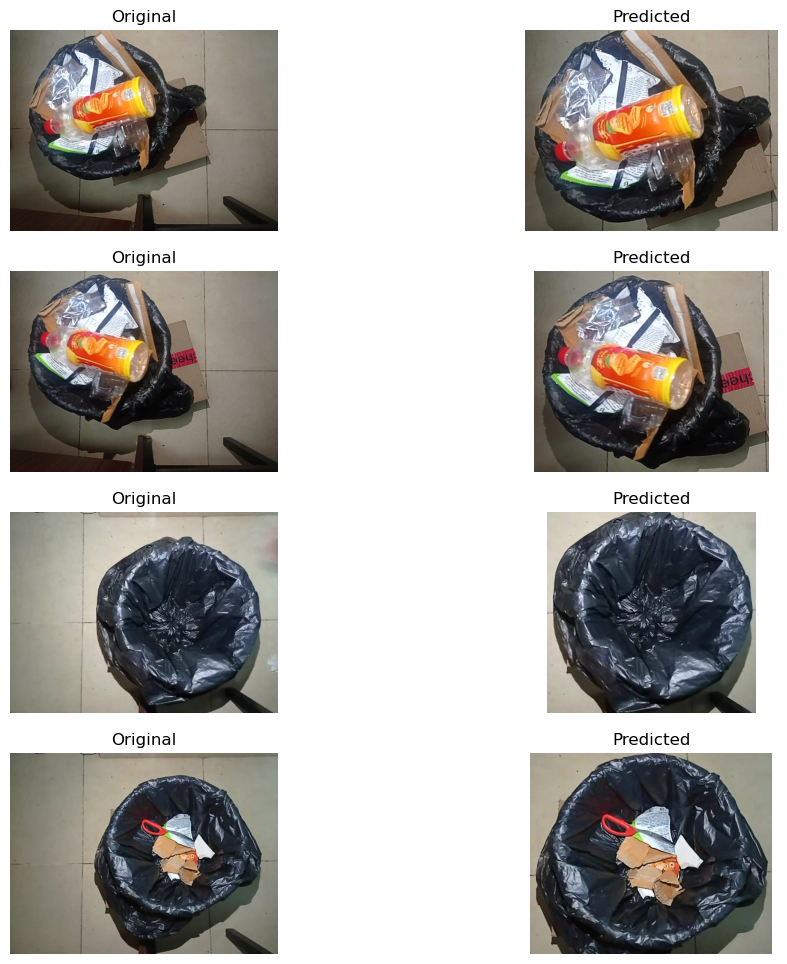

In [3]:
Test_dir=os.getcwd()+"\\test"
fig=plt.figure(figsize=(12,12))
columns=2
rows=len(os.listdir(Test_dir))
i=1
for file in os.listdir(Test_dir):
    file_path=Test_dir+"\\"+file
    img=cv2.imread(file_path)
    fig.add_subplot(rows,columns,i).title.set_text("Original")
    i=i+1
    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    
    x1,y1,x2,y2=model.predict(file_path)[0].boxes.xyxy[0]
    x1=int(x1)
    x2=int(x2)
    y1=int(y1)
    y2=int(y2)
    fig.add_subplot(rows,columns,i).title.set_text("Predicted")
    i=i+1
    plt.axis('off')
    plt.imshow(img[y1:y2,x1:x2,::-1])